In [18]:
# Import Statements
import sys
import math
import time
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(17896)

In [19]:
# User Defined Inputs
T = 50
L = 2.5
N = 40
nSweeps = 5000
dispSize = 0.1
printModulus = 10
writeModulus = 10
sigma = 0.34
epsilon = 1.65
kB = 0.0138064852

In [20]:
# Code from Project2 that is needed here:
# Wrapping function
def wrap(r, L):
    return [coord % L for coord in r]

# Pairwise distance
def dist(r1, r2, L):
    halfL = L / 2.0
    d = [(c2 - c1 + halfL) % L - halfL for c1, c2 in zip(r1, r2)]
    return math.sqrt(sum(x**2 for x in d))

# Pairwise Lennard-Jones energy
def E_ij(s, sigma, epsilon):
    q6 = (sigma / s) ** 6
    return 4 * epsilon * (q6 ** 2 - q6)

# Energy of particle i
def E_i(ri,i,xyz,L,sigma,epsilon):
    N = xyz.shape[0]
    E_i = 0.
    for j in range(N):
        if j!=i:
            rj = xyz[j,:]
            d = dist(ri,rj,L)
            E_i += E_ij(d,sigma,epsilon) 
    return E_i

# Total energy of the system
def E_system(xyz, L, sigma, epsilon):
    N = len(xyz)
    return sum(E_ij(dist(xyz[i], xyz[j], L), sigma, epsilon) for i in range(N) for j in range(i))

In [21]:
# Initialization with random positions avoiding collisions
def init_rand(N, L, sigma):
    xyz = np.zeros((N, 3))
    
    for i in range(N):
        while True:
            r1 = np.random.uniform(0, L, 3)
            if all(dist(r1, xyz[j], L) >= sigma for j in range(i)):  # Check collisions
                xyz[i] = r1
                break

    # Final collision check
    for i in range(N):
        for j in range(i):
            if dist(xyz[i], xyz[j], L) < sigma:
                raise Exception(f'Collision between particles {i+1} and {j+1}')
    
    return xyz

def plot_config(xyz, L):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], s=100)
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_zlim(0, L)
    plt.show()

In [22]:
# Functions I need for the MCMC
def rand_translation(dispSize):
    r = dispSize * np.random.uniform(-1, 1, 3)
    return r

In [23]:
# Initialization of particles
xyz = init_rand(N, L, sigma)

In [24]:
# writing coordinates to file
def xyzWrite(xyz,outfile,writeStyle):
    xyzfile = open('./'+outfile, writeStyle)
    
    xyzfile.write('%d\n' % N)
    xyzfile.write('\n')
    for ii in range(N):
        xyzfile.write('%5s %8.5e %8.5e %8.5e\n' % ('Ar',xyz[ii,0]*10,xyz[ii,1]*10,xyz[ii,2]*10)) # Angstroms
    
    xyzfile.close()

In [25]:
# Metropolis Monte Carlo main loop
E_traj = []
trial_counter, acc_counter = 0, 0

for sweep in range(nSweeps):
    # print(f'MC sweep {sweep+1}')

    for _ in range(N):
        # Select a random particle and compute its current energy
        tag = np.random.randint(0, N)
        xyz_tag_old = xyz[tag, :]
        E_tag_old = E_i(xyz_tag_old, tag, xyz, L, sigma, epsilon)

        # Trial move with periodic boundary conditions
        xyz_tag_new_wrap = wrap(xyz_tag_old + dispSize * np.random.uniform(-1, 1, 3), L)
        E_tag_new = E_i(xyz_tag_new_wrap, tag, xyz, L, sigma, epsilon)

        # Metropolis criterion
        deltaE = E_tag_new - E_tag_old
        if deltaE < 0 or (T > 0 and np.random.random() < np.exp(-deltaE / (kB * T))):
            xyz[tag, :] = xyz_tag_new_wrap
            acc_counter += 1

        trial_counter += 1

    # Print status
    if (sweep + 1) % printModulus == 0:
        E = E_system(xyz, L, sigma, epsilon)
        E_traj.append(E)
        print(f' Sweep = {sweep+1}')
        print(f' E = {E:.5e} zJ')
        print(f'  acceptance ratio = {acc_counter / trial_counter:.5e}' if trial_counter > 0 else '  acceptance ratio = 0')

    # Write trajectory to file
    if (sweep + 1) % writeModulus == 0:
        xyzWrite(xyz, 'traj.xyz', 'a')


 Sweep = 10
 E = -4.39232e+01 zJ
  acceptance ratio = 6.97500e-01
 Sweep = 20
 E = -5.87741e+01 zJ
  acceptance ratio = 6.71250e-01
 Sweep = 30
 E = -5.91218e+01 zJ
  acceptance ratio = 6.25833e-01
 Sweep = 40
 E = -6.57843e+01 zJ
  acceptance ratio = 5.87500e-01
 Sweep = 50
 E = -6.68988e+01 zJ
  acceptance ratio = 5.78000e-01
 Sweep = 60
 E = -6.94526e+01 zJ
  acceptance ratio = 5.76667e-01
 Sweep = 70
 E = -7.00358e+01 zJ
  acceptance ratio = 5.62143e-01
 Sweep = 80
 E = -7.79474e+01 zJ
  acceptance ratio = 5.54063e-01
 Sweep = 90
 E = -7.82630e+01 zJ
  acceptance ratio = 5.43333e-01
 Sweep = 100
 E = -8.27428e+01 zJ
  acceptance ratio = 5.30500e-01
 Sweep = 110
 E = -8.60296e+01 zJ
  acceptance ratio = 5.20682e-01
 Sweep = 120
 E = -9.74600e+01 zJ
  acceptance ratio = 5.10417e-01
 Sweep = 130
 E = -1.15579e+02 zJ
  acceptance ratio = 5.01923e-01
 Sweep = 140
 E = -1.22289e+02 zJ
  acceptance ratio = 4.90714e-01
 Sweep = 150
 E = -1.17080e+02 zJ
  acceptance ratio = 4.86000e-01
 Swe

## State 1

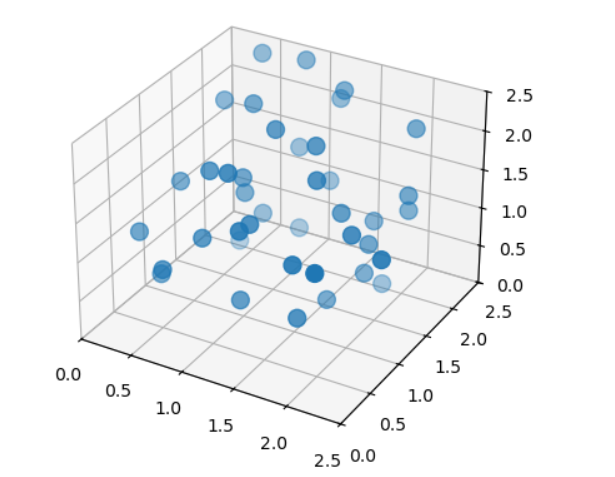

## State Final

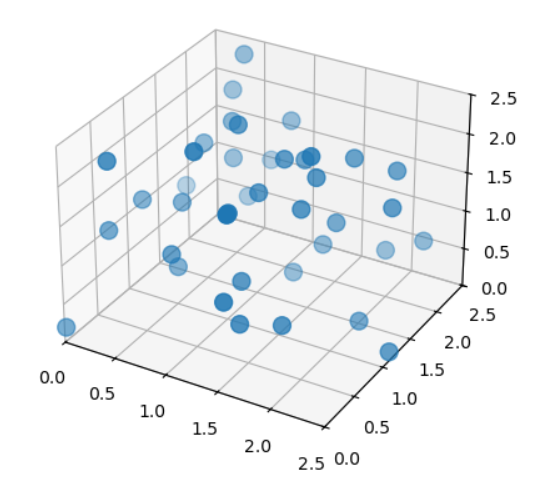

Note: The VMD was failing to visualize my xyz file so I just plotted the configurations using python.

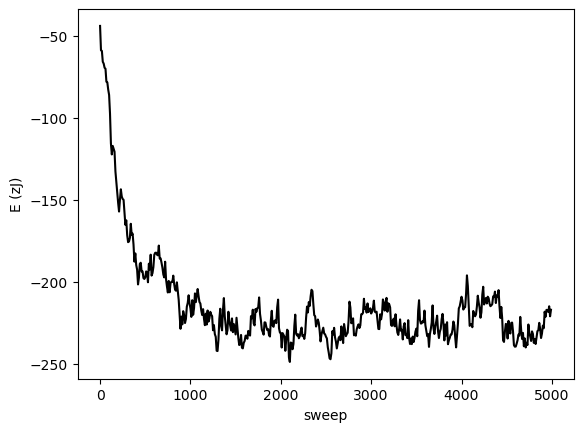

In [26]:
fig, ax = plt.subplots()
ax.plot(writeModulus*np.arange(len(E_traj)), E_traj, 'k-', marker='')
ax.set_xlabel("sweep")
ax.set_ylabel("E (zJ)")
plt.draw()
plt.show()

My values SHOULD be decreasing, as the system evolves towards equilibrium. However, there appears to an inconsistency in the data, although I was unable to spot where the issue was in the code. 